In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

In [251]:
real_data = pd.read_excel("Feature_Track.xlsx", index_col=0)
real_data.head()

,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
0,0AC2A4,1,7,1,1,0,0,1,0,0,...,0.13222,0.08812,0.13469,0.08590,0.05499,0.04078,0.08419,0.06275,0.03722,0.02711
1,0AC2A4,1,27,1,0,1,0,1,0,0,...,0.13639,0.08118,0.12483,0.07588,0.04060,0.02869,0.05951,0.04759,0.02963,0.01753
2,0AC2A4,1,33,1,0,0,1,1,0,0,...,0.19671,0.11480,0.10121,0.09079,0.04339,0.02727,0.06250,0.04305,0.03296,0.01751
3,0AC2A4,1,43,1,1,0,0,0,0,0,...,0.20826,0.12873,0.11832,0.11087,0.04872,0.02917,0.06894,0.04766,0.03627,0.01744
4,0AC2A4,1,58,1,1,0,0,0,0,0,...,0.21193,0.14454,0.13428,0.13604,0.04173,0.02743,0.05937,0.04344,0.03132,0.01762


In [252]:
real_data.shape

(1056, 88)

88


<Axes: >

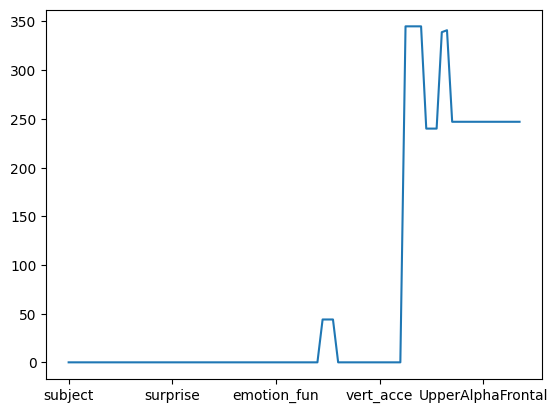

In [253]:
null_cols = real_data.isnull().sum()
print(len(null_cols))
null_cols.plot()

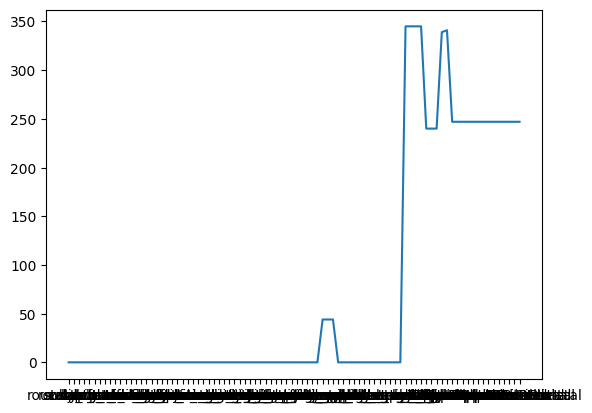

In [254]:
plt.plot(null_cols)
plt.show()

In [255]:
sim_data = pd.read_excel("Feature_Simulation.xlsx", index_col=0)
sim_data.head()

,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
0,0AC2A4,1,13,1,0,0,1,0,0,0,...,0.12420,0.07737,0.12307,0.07681,0.05046,0.03492,0.07430,0.05289,0.03606,0.02393
1,0AC2A4,1,32,0,1,0,1,0,0,0,...,0.20402,0.10296,0.14606,0.10325,0.03636,0.02433,0.05822,0.04136,0.02535,0.01391
2,0AC2A4,1,36,0,0,1,1,0,0,0,...,0.20329,0.12355,0.09483,0.08173,0.04524,0.02847,0.06055,0.04321,0.03586,0.01923
3,0AC2A4,1,42,1,0,0,0,0,0,0,...,0.20325,0.12153,0.11255,0.10920,0.04928,0.02923,0.07192,0.04653,0.03536,0.01832
4,0AC2A4,1,52,1,0,0,0,0,1,0,...,0.19645,0.13454,0.13270,0.13759,0.04501,0.02943,0.06175,0.04715,0.03511,0.01838


In [256]:
sim_data.shape

(1287, 88)

In [257]:
numerical_features = real_data.select_dtypes(include=['float64']).columns
numerical_features

Index(['max_speed', 'avg_speed', 'std_speed', 'yaw', 'yaw_rate', 'roll',
       'roll_rate', 'pitch', 'pitch_rate', 'lat_acce', 'long_acce',
       'vert_acce', 'avg_acce_pedal_pos', 'std_acce_pedal_pos',
       'avg_steer_angle', 'std_steer_angle', 'hr', 'hrv_lf', 'hrv_hf',
       'hrv_lfhf_ratio', 'gsr_tonic', 'gsr_phasic', 'gsr_peaks', 'EBRmean',
       'BDmean', 'ThetaFrontal', 'ThetaParietal', 'AlphaFrontal',
       'AlphaParietal', 'LowerAlphaFrontal', 'LowerAlphaParietal',
       'UpperAlphaFrontal', 'UpperAlphaParietal', 'BetaFrontal',
       'BetaParietal', 'LowerBetaFrontal', 'LowerBetaParietal',
       'UpperBetaFrontal', 'UpperBetaParietal'],
      dtype='object')

In [258]:
categorical_features = real_data.select_dtypes(exclude=['float64']).columns
categorical_features

Index(['subject', 'lap', 'start_time', 'straight', 'roundabout_entry',
       'roundabout_exit', 'zebra_crossing', 'left_turn', 'u_turn',
       'bypass_dummy', 'car', 'pedestrian', 'traffic_light', 'narrow_road',
       'dummy', 'bend', 'habituation', 'traffic', 'hurry', 'frustration',
       'surprise', 'risk_outcome', 'risk_source_env', 'risk_source_other_usr',
       'risk_source_driver', 'risk_source_crash', 'risk_evaluation',
       'violation_no', 'violation_roadside_invasion', 'violation_give_the_way',
       'violation_road_signs', 'violation_heavy_braking',
       'violation_roadside_exit', 'violation_slowdown', 'emotion_na',
       'emotion_neutral', 'emotion_surprise', 'emotion_anger',
       'emotion_boredom', 'emotion_fear', 'emotion_fun', 'gaze_na',
       'gaze_complete_expl', 'gaze_partial_expl', 'gaze_poor_expl',
       'distraction_na', 'distraction_no', 'distraction_reduced_attention',
       'distraction_speaking'],
      dtype='object')

In [259]:
set(sim_data.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [260]:
categorical_featurers = []
binary_features =  [] 

In [261]:
real_data.frustration.unique()

array([2, 1], dtype=int64)

### Todo:
- Separate the categorical features from the numerical features
- Deal with missing values

In [262]:
for col in real_data.columns:
    print(col, real_data[col].isnull().sum())

subject 0
lap 0
start_time 0
straight 0
roundabout_entry 0
roundabout_exit 0
zebra_crossing 0
left_turn 0
u_turn 0
bypass_dummy 0
car 0
pedestrian 0
traffic_light 0
narrow_road 0
dummy 0
bend 0
habituation 0
traffic 0
hurry 0
frustration 0
surprise 0
risk_outcome 0
risk_source_env 0
risk_source_other_usr 0
risk_source_driver 0
risk_source_crash 0
risk_evaluation 0
violation_no 0
violation_roadside_invasion 0
violation_give_the_way 0
violation_road_signs 0
violation_heavy_braking 0
violation_roadside_exit 0
violation_slowdown 0
emotion_na 0
emotion_neutral 0
emotion_surprise 0
emotion_anger 0
emotion_boredom 0
emotion_fear 0
emotion_fun 0
gaze_na 0
gaze_complete_expl 0
gaze_partial_expl 0
gaze_poor_expl 0
distraction_na 0
distraction_no 0
distraction_reduced_attention 0
distraction_speaking 0
max_speed 44
avg_speed 44
std_speed 44
yaw 0
yaw_rate 0
roll 0
roll_rate 0
pitch 0
pitch_rate 0
lat_acce 0
long_acce 0
vert_acce 0
avg_acce_pedal_pos 0
std_acce_pedal_pos 0
avg_steer_angle 0
std_st

In [263]:
def fill_null_vals(dataset, groupby_col="subject") -> pd.DataFrame:
    for column in dataset.columns:
        # Skip the column used for grouping
        if column == groupby_col:
            continue
        # Apply group-specific mean for each column with missing values
        dataset[column] = dataset.groupby(groupby_col)[column].transform(lambda x: x.fillna(x.mean()))
    return dataset

In [264]:
real_data_nulls_filled = fill_null_vals(real_data, "subject")

In [265]:
for col in real_data_nulls_filled.columns:
    print(col, real_data[col].isnull().sum())

subject 0
lap 0
start_time 0
straight 0
roundabout_entry 0
roundabout_exit 0
zebra_crossing 0
left_turn 0
u_turn 0
bypass_dummy 0
car 0
pedestrian 0
traffic_light 0
narrow_road 0
dummy 0
bend 0
habituation 0
traffic 0
hurry 0
frustration 0
surprise 0
risk_outcome 0
risk_source_env 0
risk_source_other_usr 0
risk_source_driver 0
risk_source_crash 0
risk_evaluation 0
violation_no 0
violation_roadside_invasion 0
violation_give_the_way 0
violation_road_signs 0
violation_heavy_braking 0
violation_roadside_exit 0
violation_slowdown 0
emotion_na 0
emotion_neutral 0
emotion_surprise 0
emotion_anger 0
emotion_boredom 0
emotion_fear 0
emotion_fun 0
gaze_na 0
gaze_complete_expl 0
gaze_partial_expl 0
gaze_poor_expl 0
distraction_na 0
distraction_no 0
distraction_reduced_attention 0
distraction_speaking 0
max_speed 0
avg_speed 0
std_speed 0
yaw 0
yaw_rate 0
roll 0
roll_rate 0
pitch 0
pitch_rate 0
lat_acce 0
long_acce 0
vert_acce 0
avg_acce_pedal_pos 0
std_acce_pedal_pos 0
avg_steer_angle 0
std_steer

In [266]:
sim_data_nulls_filled = fill_null_vals(sim_data)

for col in sim_data_nulls_filled.columns:
    print(col, sim_data_nulls_filled[col].isnull().sum())

subject 0
lap 0
start_time 0
straight 0
roundabout_entry 0
roundabout_exit 0
zebra_crossing 0
left_turn 0
u_turn 0
bypass_dummy 0
car 0
pedestrian 0
traffic_light 0
narrow_road 0
dummy 0
bend 0
habituation 0
traffic 0
hurry 0
frustration 0
surprise 0
risk_outcome 0
risk_source_env 0
risk_source_other_usr 0
risk_source_driver 0
risk_source_crash 0
risk_evaluation 0
violation_no 0
violation_roadside_invasion 0
violation_give_the_way 0
violation_road_signs 0
violation_heavy_braking 0
violation_roadside_exit 0
violation_slowdown 0
emotion_na 0
emotion_neutral 0
emotion_surprise 0
emotion_anger 0
emotion_boredom 0
emotion_fear 0
emotion_fun 0
gaze_na 0
gaze_complete_expl 0
gaze_partial_expl 0
gaze_poor_expl 0
distraction_na 0
distraction_no 0
distraction_reduced_attention 0
distraction_speaking 0
max_speed 0
avg_speed 0
std_speed 0
yaw 0
yaw_rate 0
roll 0
roll_rate 0
pitch 0
pitch_rate 0
lat_acce 0
long_acce 0
vert_acce 0
avg_acce_pedal_pos 0
std_acce_pedal_pos 0
avg_steer_angle 0
std_steer

In [267]:
group_by_subject = real_data.groupby('subject')
group_by_subject.size()

subject
0AC2A4    55
13790E    55
144282    66
2268A5    77
492488    77
6B11F5    66
8924EA    77
92710E    55
B410A4    66
B570F8    77
C1CE6B    77
D4F190    44
DCF930    55
ED731A    77
EDEB96    66
F9D528    66
dtype: int64

In [268]:
real_data.subject.unique()

array(['0AC2A4', '13790E', '144282', '2268A5', '6B11F5', '92710E',
       'B410A4', 'B570F8', 'C1CE6B', 'D4F190', 'DCF930', 'ED731A',
       'EDEB96', 'F9D528', '492488', '8924EA'], dtype=object)

In [269]:
group_has_null = real_data_nulls_filled.groupby('subject').apply(lambda x: x.isnull().any(axis=1).any())
# Display groups that have null values
groups_with_nulls = group_has_null[group_has_null].index.tolist()
print("Groups with null values:", groups_with_nulls)

Groups with null values: ['B570F8']


In [270]:
# drop all rows with null values
real_data_nulls_filled = real_data_nulls_filled.dropna()
real_data_nulls_filled.shape

(979, 88)

In [271]:
# drop all rows with null values
sim_data_nulls_filled = sim_data_nulls_filled.dropna()
sim_data_nulls_filled.shape

(1287, 88)

In [272]:
filtered_rows = real_data[real_data["subject"] == "B570F8"]
filtered_rows

,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
440,B570F8,1,13,1,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,B570F8,1,30,0,1,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,B570F8,1,38,0,0,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,B570F8,1,43,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,B570F8,1,60,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,B570F8,7,109,0,1,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,B570F8,7,118,0,0,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,B570F8,7,120,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,B570F8,7,136,1,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
sim_data.shape

(1287, 88)

In [274]:
group_has_null = sim_data_nulls_filled.groupby('subject').apply(lambda x: x.isnull().any(axis=1).any())
# Display groups that have null values
groups_with_nulls = group_has_null[group_has_null].index.tolist()
print("Groups with null values:", groups_with_nulls)

Groups with null values: []


In [275]:
# Features to train model on
selected_cols = [
    'lap',
    'start_time',
    'straight',
    'roundabout_entry',
    'roundabout_exit',
    'zebra_crossing',
    'left_turn',
    'u_turn',
    'bypass_dummy',
    'car',
    'pedestrian',
    'traffic_light',
    'narrow_road',
    'dummy',
    'bend',
    'habituation',
    'traffic',
    'hurry',
    'frustration',
    'surprise',
    'risk_outcome',
    'risk_source_env',
    'risk_source_other_usr',
    'risk_source_driver',
    'risk_source_crash',
    'violation_roadside_invasion',
    'violation_give_the_way',
    'violation_road_signs',
    'violation_heavy_braking',
    'violation_roadside_exit',
    'violation_slowdown',
    'emotion_na',
    'emotion_neutral',
    'emotion_surprise',
    'emotion_anger',
    'emotion_boredom',
    'emotion_fear',
    'gaze_na',
    'gaze_complete_expl',
    'gaze_partial_expl',
    'gaze_poor_expl',
    'distraction_na',
    'distraction_no',
    'distraction_reduced_attention',
    'max_speed',
    'avg_speed',
    'std_speed',
    'yaw',
    'yaw_rate',
    'roll',
    'roll_rate',
    'pitch',
    'pitch_rate',
    'long_acce',
    'vert_acce',
    'avg_acce_pedal_pos',
    'std_acce_pedal_pos',
    'std_steer_angle'
]

In [276]:
real_data_nulls_filled.drop(['subject'], axis=1, inplace=True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_35684\3289618982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data_nulls_filled.drop(['subject'], axis=1, inplace=True)


In [277]:
# Calculate the correlation matrix
corr_matrix = real_data_nulls_filled.corr()

# Initialize a list to store pairs of highly correlated features
highly_correlated_features = []

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)): # Avoid repeating pairs and self-correlation
        if np.abs(corr_matrix.iloc[i, j]) >= 0.8:
            # If absolute correlation is 0.8 or more, add the pair to the list
            highly_correlated_features.append((corr_matrix.columns[i], corr_matrix.columns[j]))

In [278]:
highly_correlated_features

[('risk_source_driver', 'risk_evaluation'),
 ('risk_source_driver', 'violation_no'),
 ('risk_evaluation', 'violation_no'),
 ('emotion_neutral', 'emotion_fun'),
 ('distraction_no', 'distraction_speaking'),
 ('max_speed', 'avg_speed'),
 ('yaw', 'lat_acce'),
 ('yaw', 'avg_steer_angle'),
 ('lat_acce', 'avg_steer_angle'),
 ('gsr_tonic', 'gsr_phasic'),
 ('gsr_tonic', 'gsr_peaks'),
 ('gsr_phasic', 'gsr_peaks'),
 ('ThetaFrontal', 'ThetaParietal'),
 ('ThetaFrontal', 'AlphaFrontal'),
 ('ThetaFrontal', 'AlphaParietal'),
 ('ThetaFrontal', 'LowerAlphaFrontal'),
 ('ThetaFrontal', 'LowerAlphaParietal'),
 ('ThetaParietal', 'AlphaParietal'),
 ('ThetaParietal', 'LowerAlphaParietal'),
 ('AlphaFrontal', 'AlphaParietal'),
 ('AlphaFrontal', 'LowerAlphaFrontal'),
 ('AlphaFrontal', 'LowerAlphaParietal'),
 ('AlphaFrontal', 'UpperAlphaFrontal'),
 ('AlphaFrontal', 'UpperAlphaParietal'),
 ('AlphaParietal', 'LowerAlphaFrontal'),
 ('AlphaParietal', 'LowerAlphaParietal'),
 ('AlphaParietal', 'UpperAlphaFrontal'),
 ('

In [279]:
r_data = real_data_nulls_filled[selected_cols]
r_data.shape

(979, 58)

In [280]:
X = r_data.drop(['frustration'], axis=1)
y = r_data['frustration']

In [281]:
target = y.map({1: 1, 2: 0})

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, target, stratify=target, test_size=0.2, random_state=42)

In [283]:
xgb_clf = XGBClassifier(eval_metric='logloss')

In [284]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=5)

In [285]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [286]:
# Print the accuracy for each fold
# print("Accuracy scores for each fold:")
# print(cv_scores)

In [287]:
feature_importances = xgb_clf.feature_importances_
feature_importances

array([3.5563970e-01, 3.9055413e-03, 1.2448957e-01, 0.0000000e+00,
       0.0000000e+00, 1.6627231e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.9210358e-02,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.5620936e-02, 3.8687527e-01, 0.0000000e+00, 1.2396635e-02,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.3188314e-03,
       1.2146109e-02, 0.0000000e+00, 5.7110487e-04, 2.7359842e-04,
       0.0000000e+00, 7.4454851e-04, 1.2272372e-03, 0.0000000e+00,
       4.5608607e-04, 0.0000000e+00, 2.5719078e-03, 7.3141628e-03,
       2.5757111e-03], dtype=float32)

<Figure size 1000x500 with 0 Axes>

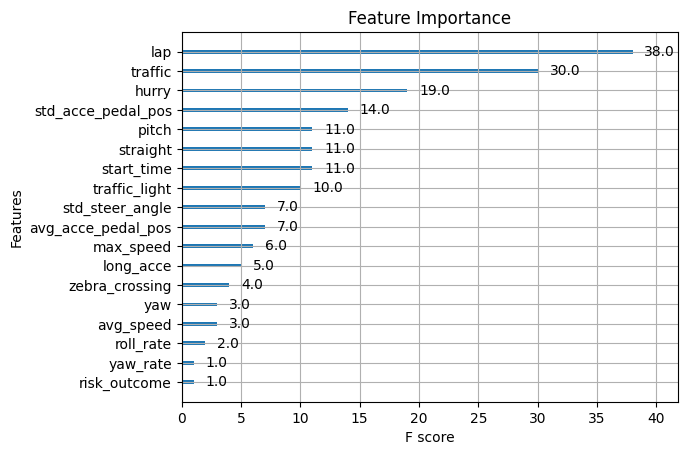

In [288]:
# Plot feature importances
plt.figure(figsize=(10, 5))
plot_importance(xgb_clf, importance_type='weight', title='Feature Importance')
plt.show()

In [289]:
preds = xgb_clf.predict(X_test)

In [290]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00        33

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196



In [291]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
)
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import (
    BernoulliNB,
    GaussianNB
)
from sklearn.ensemble import (
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


In [292]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00        33

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196



In [293]:
balanced_acc = balanced_accuracy_score(y_test, preds)
print(balanced_acc)

1.0


In [294]:
confusion_matrix(y_test, preds)

array([[163,   0],
       [  0,  33]], dtype=int64)

In [295]:
models = {
    'LogisticRegression':LogisticRegression(),
    'BaggingClassifier': BaggingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LinearSVC':LinearSVC(),
    'SGDClassifier':SGDClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    "SVC":SVC(),
    "GaussianProcessClassifier": GaussianProcessClassifier(),
    "MLPClassifier": MLPClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GaussianNB":GaussianNB(),
    "QuadraticDiscriminantAnalysis":QuadraticDiscriminantAnalysis(),
    "XGBOOST": XGBClassifier()
}

In [296]:
performance = pd.DataFrame(columns=["Train Accuracy","Test Accuracy"], index=list(models.keys()))

In [297]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    #Save Test and Training Accuracies
    performance.loc[name, :] = [train_accuracy,test_accuracy]

C:\Users\abdul\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abdul\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\abdul\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\abdul\AppData\Ro

In [298]:
performance.sort_values(by=['Test Accuracy'], ascending=False)

,Train Accuracy,Test Accuracy
DecisionTreeClassifier,1.0,1.0
GradientBoostingClassifier,1.0,1.0
AdaBoostClassifier,1.0,1.0
XGBOOST,1.0,1.0
BaggingClassifier,1.0,0.989796
RandomForestClassifier,1.0,0.979592
LogisticRegression,0.965517,0.969388
MLPClassifier,0.988506,0.964286
LinearSVC,0.969349,0.954082
QuadraticDiscriminantAnalysis,0.916986,0.908163


In [299]:
cor = np.abs(r_data.corr())
cor_target = abs(cor['frustration'])
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

traffic        0.514244
hurry          0.583842
frustration    1.000000
Name: frustration, dtype: float64

In [300]:
s_data = sim_data_nulls_filled[selected_cols]
s_data.shape

(1287, 58)

In [301]:
S_data = s_data.drop(['frustration'], axis=1)
S_y  = s_data["frustration"]
s_target = S_y.map({1:1, 2:0})

In [302]:
s_tartget.value_counts()

frustration
0    1084
1     203
Name: count, dtype: int64

In [303]:
S_train, S_test, y_train_s, y_test_s = train_test_split(S_data, s_target, test_size=0.2, stratify=s_target, random_state=42)

In [304]:
performance2 = pd.DataFrame(columns=["Train Accuracy","Test Accuracy"], index=list(models.keys()))

In [305]:
for name, model in models.items():
    # Train the model
    model.fit(S_train, y_train_s)

    # Make predictions on the test set
    y_train_pred_s = model.predict(S_train)
    y_test_pred_s = model.predict(S_test)

    # Calculate evaluation metrics
    test_accuracy = accuracy_score(y_test_s, y_test_pred_s)
    train_accuracy = accuracy_score(y_train_s, y_train_pred_s)

    #Save Test and Training Accuracies
    performance2.loc[name, :] = [train_accuracy,test_accuracy]

C:\Users\abdul\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abdul\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\abdul\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\abdul\AppData\Ro

In [306]:
performance2.sort_values(by=['Test Accuracy'], ascending=False)

,Train Accuracy,Test Accuracy
DecisionTreeClassifier,1.0,1.0
AdaBoostClassifier,1.0,1.0
XGBOOST,1.0,0.996124
LogisticRegression,0.993197,0.992248
BaggingClassifier,1.0,0.988372
RandomForestClassifier,1.0,0.988372
GradientBoostingClassifier,1.0,0.988372
QuadraticDiscriminantAnalysis,0.98931,0.972868
LinearSVC,0.974733,0.968992
GaussianNB,0.974733,0.957364


In [307]:
xgb_clf_s = XGBClassifier(eval_metric='logloss')

In [308]:
xgb_clf_s.fit(S_train, y_train_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

<Figure size 1000x500 with 0 Axes>

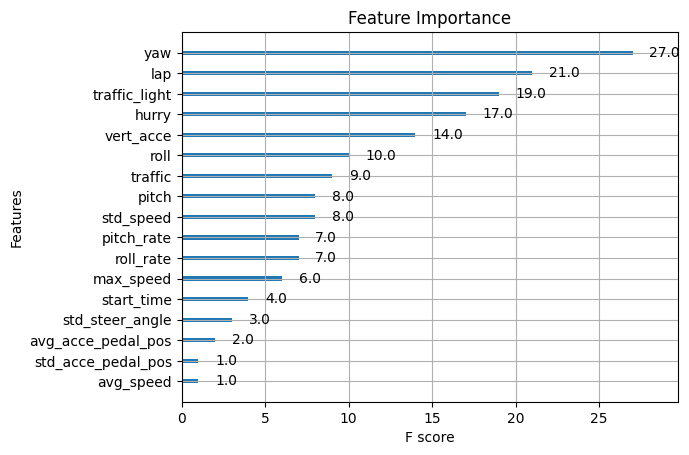

In [309]:
# Plot feature importances
plt.figure(figsize=(10, 5))
plot_importance(xgb_clf_s, importance_type='weight', title='Feature Importance')
plt.show()

<Figure size 1000x500 with 0 Axes>

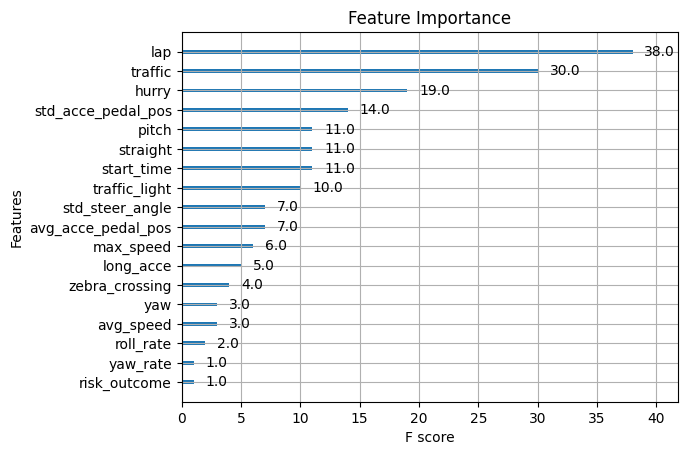

In [310]:
# Plot feature importances
plt.figure(figsize=(10, 5))
plot_importance(xgb_clf, importance_type='weight', title='Feature Importance')
plt.show()

In [311]:
r_data.lap.unique()

array([1, 2, 3, 6, 7, 5, 4], dtype=int64)

In [312]:
condition1 = real_data_nulls_filled.lap == 6
condition2 = real_data_nulls_filled.lap == 7
condition3 = real_data_nulls_filled.lap == 5

In [313]:
train = real_data_nulls_filled[condition1 | condition2]
test = real_data_nulls_filled[condition3]

In [319]:
X_train = train.drop(['lap'], axis=1)
y_train = train['frustration']

X_test = test.drop(['lap'], axis=1)
y_test = test['frustration']

In [320]:
y_train = y_train.map({1:1, 2:0})
y_test = y_test.map({1:1, 2:0})

In [321]:
xgb_clf_subset = XGBClassifier(eval_metric='logloss')


In [322]:
xgb_clf_subset.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

<Figure size 1000x500 with 0 Axes>

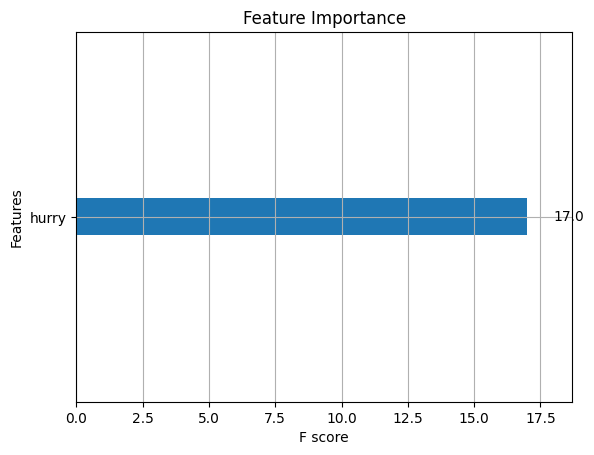

In [323]:
# Plot feature importances
plt.figure(figsize=(10, 5))
plot_importance(xgb_clf_subset, importance_type='weight', title='Feature Importance')
plt.show()